# Analysis of Sentiment 

## Data Cleaning

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb
import os


pd.set_option('display.max_rows', 300) # specifies number of rows to show
# specifies default number format to 4 decimal places
pd.options.display.float_format = '{:40,.2f}'.format 
pd.options.display.max_colwidth 
pd.options.display.max_colwidth = 1500

In [176]:
# For Cleaning Tweets and Sentiment Analysis
import string
import nltk

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
#import nltk and download all stopwords and punctuations
nltk.download('stopwords')
nltk.download('punkt')

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/audevuilliomenet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/audevuilliomenet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [334]:
# Need to install plotly before using it! Run the !pip command bellow!
# !pip install plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.io as pio

#You can also plot your graphs offline inside a Jupyter Notebook Environment. 
#First you need to initiate the Plotly Notebook mode as below:
init_notebook_mode(connected=True)

In [9]:
#df.to_csv("Tweeter_Data.csv")
twittertext = pd.read_csv("Tweeter_Data.csv")
twittertext.head(2)

,Unnamed: 0,Date,UserID,UserScreenName,Text,UserLocation,retweet_count,UserFollowers,UserFriends,UserLanguage,RetweetUserName,Retweet_Create,RetweetUserFollowers,RetweetText,source,Media,Hour,Day,FreqDay,FreqHour
0,0,2019-01-28 23:05:53,1133610576,MarymoBelfast,RT @leedowningkeat: Why im still vegan. Share and watch this to counteract the ex vegan trend\n\nhttps://t.co/6ICiJ9n2R4\n\n#whyimstillvegan #f…,Ireland,6,12498,12525,en,lee downing keat,2019-01-27 08:55:42,162.00,Why im still vegan. Share and watch this to counteract the ex vegan trend\n\nhttps://t.co/6ICiJ9n2R4… https://t.co/8FYJzmB4cd,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",NaN,23,28,2534,658
1,1,2019-01-28 23:03:51,1088500218964828160,Lilly84914614,"RT @XVX_Food: Lunch today was the @marksandspencer sweet potato biryani wrap and some of their salted tortilla chips, it was absolutely del…",NaN,0,3,17,en,Vegan Food Only Ⓥ,2019-01-28 12:23:51,13.00,"Lunch today was the @marksandspencer sweet potato biryani wrap and some of their salted tortilla chips, it was abso… https://t.co/nRbjMQ93io","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,23,28,2534,658


In [10]:
twittertext = twittertext.drop(['Unnamed: 0'], axis=1)

In [22]:
twittertext.head(2)

,Date,UserID,UserScreenName,Text,UserLocation,retweet_count,UserFollowers,UserFriends,UserLanguage,RetweetUserName,...,Day,FreqDay,FreqHour,hashtags,twitter_handles,cleanText,tokenText,noStopWords,tokenTextnoStop,tokenCount
0,2019-01-28 23:05:53,1133610576,MarymoBelfast,rt @leedowningkeat: why im still vegan. share and watch this to counteract the ex vegan trend#whyimstillvegan #f,Ireland,6,12498,12525,en,lee downing keat,...,28,2534,658,"[#whyimstillvegan, #f]",[@leedowningkeat],rt leedowningkeat why im still vegan share and watch this to counteract the ex vegan trendwhyimstillvegan f,"[rt, leedowningkeat, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trendwhyimstillvegan, f]",rt leedowningkeat im still vegan share watch counteract ex vegan trendwhyimstillvegan f,"[rt, leedowningkeat, im, still, vegan, share, watch, counteract, ex, vegan, trendwhyimstillvegan, f]",17
1,2019-01-28 23:03:51,1088500218964828160,Lilly84914614,"rt @xvx_food: lunch today was the @marksandspencer sweet potato biryani wrap and some of their salted tortilla chips, it was absolutely del",NaN,0,3,17,en,Vegan Food Only Ⓥ,...,28,2534,658,[],"[@xvx_food, @marksandspencer]",rt xvxfood lunch today was the marksandspencer sweet potato biryani wrap and some of their salted tortilla chips it was absolutely del,"[rt, xvxfood, lunch, today, was, the, marksandspencer, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",rt xvxfood lunch today marksandspencer sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, xvxfood, lunch, today, marksandspencer, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]",22


In [13]:
# Remove all the https
twittertext.Text = twittertext.Text.str.replace(r'http\S+','')

In [14]:
# Remove all the '\n' line-brakes
twittertext.Text = twittertext.Text.str.replace(r'\n','')

In [15]:
# Remove 'non-ascii' characters
twittertext.Text = twittertext.Text.str.replace(r'[^\x00-\x7F]','')
# Make all the text lowercase
twittertext.Text = twittertext.Text.str.lower()

In [16]:
#create a column for all #hasthtags that appears in the text
twittertext['hashtags'] = twittertext.Text.str.findall(r'#\S+')
#create a column for all @twitter handles that appears in the tweets
twittertext['twitter_handles'] = twittertext.Text.str.findall(r'@[\w]*')

In [15]:
# Remove the #hashtags and the twitter_handles from the tweets
#twittertext.Text  = twittertext.Text.str.replace(r'#\S+','')
# Remove the @twitter_handles from the tweets
#twittertext.Text  = twittertext.Text.str.replace(r'@[\w]*','')

In [17]:
# Remove all the punctuation 
twittertext['cleanText'] = twittertext.Text.apply(
    lambda x:x.translate(str.maketrans('','', string.punctuation)))

In [18]:
# Tokenise all of the clean text
twittertext['tokenText'] = twittertext.cleanText.apply(word_tokenize)

In [21]:
# Count the number of Token in the tweets
twittertext['tokenCount'] = twittertext.tokenText.apply(len)

In [19]:
# Import stopwords with nltk.
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
twittertext['noStopWords'] = twittertext['cleanText'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [20]:
#tokenise all of the text with Stop words
twittertext['tokenTextnoStop'] = twittertext.noStopWords.apply(word_tokenize)

In [23]:
twittertext.shape

(21421, 26)

In [24]:
#Delete the duplicates of the tweets!
twittertext = twittertext.drop_duplicates(subset='cleanText')
twittertext.shape

(9008, 26)

### Understand Most Words in Tweets! 

Looking at the cleanText and noStopWords columns, we can see that there are still some words that we won't need for the tweeters words analysis. For example, rt, amp or im aren't really useful to understand what the people are telling about veganuary. Moreover, the cleanText and noStopWords columns contain the hastags, this is not really helpful and we will do a column without the hastags!

In [25]:
# Copy the dataframe!
twittertext_nohastags = twittertext

In [29]:
# Remove all the hashtags
twittertext_nohastags['clean_no_hashtags'] = twittertext_nohastags.Text.str.replace(r'#\S+','')
# Remove the twitterhandlers!
twittertext_nohastags.clean_no_hashtags =  twittertext_nohastags.clean_no_hashtags.str.replace(r'@[\w]*','')

In [31]:
# Remove all the punctuation 
twittertext_nohastags.clean_no_hashtags = twittertext_nohastags.clean_no_hashtags.apply(
    lambda x:x.translate(str.maketrans('','', string.punctuation)))

In [33]:
# Tokenise all of the clean text
twittertext_nohastags['tokenNoHastags'] = twittertext_nohastags.clean_no_hashtags.apply(word_tokenize)

# Count the number of Token in the tweets
twittertext_nohastags['tokenNoHastags_Count'] = twittertext_nohastags.tokenNoHastags.apply(len)

In [35]:
# Import stopwords with nltk.
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
twittertext_nohastags['NoHastags_NoStopWords'] = twittertext_nohastags.clean_no_hashtags.apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [36]:
#tokenise all of the text with Stop words
twittertext_nohastags['Token_NoHastags_NoStopWords'] = twittertext_nohastags.NoHastags_NoStopWords.apply(word_tokenize)

In [192]:
# Remove some words that does not mean anything!
other = ['rt','amp']

# Exclude other words 
twittertext_nohastags['words_analysis'] = twittertext_nohastags['NoHastags_NoStopWords'].apply(
    lambda x:' '.join([word for word in x.split() if word not in (other)]))

In [193]:
twittertext_nohastags.head(3)

,Date,UserID,UserScreenName,Text,UserLocation,retweet_count,UserFollowers,UserFriends,UserLanguage,RetweetUserName,...,tokenText,noStopWords,tokenTextnoStop,tokenCount,clean_no_hashtags,tokenNoHastags,tokenNoHastags_Count,NoHastags_NoStopWords,Token_NoHastags_NoStopWords,words_analysis
0,2019-01-28 23:05:53,1133610576,MarymoBelfast,rt @leedowningkeat: why im still vegan. share and watch this to counteract the ex vegan trend#whyimstillvegan #f,Ireland,6,12498,12525,en,lee downing keat,...,"[rt, leedowningkeat, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trendwhyimstillvegan, f]",rt leedowningkeat im still vegan share watch counteract ex vegan trendwhyimstillvegan f,"[rt, leedowningkeat, im, still, vegan, share, watch, counteract, ex, vegan, trendwhyimstillvegan, f]",17,rt why im still vegan share and watch this to counteract the ex vegan trend,"[rt, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trend]",15,rt im still vegan share watch counteract ex vegan trend,"[rt, im, still, vegan, share, watch, counteract, ex, vegan, trend]",im still vegan share watch counteract ex vegan trend
1,2019-01-28 23:03:51,1088500218964828160,Lilly84914614,"rt @xvx_food: lunch today was the @marksandspencer sweet potato biryani wrap and some of their salted tortilla chips, it was absolutely del",NaN,0,3,17,en,Vegan Food Only Ⓥ,...,"[rt, xvxfood, lunch, today, was, the, marksandspencer, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",rt xvxfood lunch today marksandspencer sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, xvxfood, lunch, today, marksandspencer, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]",22,rt lunch today was the sweet potato biryani wrap and some of their salted tortilla chips it was absolutely del,"[rt, lunch, today, was, the, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",20,rt lunch today sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, lunch, today, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]",lunch today sweet potato biryani wrap salted tortilla chips absolutely del
2,2019-01-28 23:03:46,1948014944,GeorgiaRaeBrown,what an angel now this is the kind of #mondaymotivaton im taking about! via: @bbcnews,"England, United Kingdom",0,1280,1024,en,NaN,...,"[what, an, angel, now, this, is, the, kind, of, mondaymotivaton, im, taking, about, via, bbcnews]",angel kind mondaymotivaton im taking via bbcnews,"[angel, kind, mondaymotivaton, im, taking, via, bbcnews]",15,what an angel now this is the kind of im taking about via,"[what, an, angel, now, this, is, the, kind, of, im, taking, about, via]",13,angel kind im taking via,"[angel, kind, im, taking, via]",angel kind im taking via


In [38]:
twittertext_nohastags.shape

(9008, 31)

In [355]:
total_tweets = len(twittertext_nohastags)
print("The total number of tweets for words analysis is " + str(total_tweets) + ".")

The total number of tweets for words analysis is 9008.


### Counts Words

In [258]:
# Take all the tokens (separated words) and append them in a list
# We have a giant list of all words that have been writen in the tweets
# Other Explaination: Flatten 'Token_NoHastags_NoStopWords' into one list

tokens = []

for sublist in twittertext_nohastags.Token_NoHastags_NoStopWords:
    for word in sublist:
        tokens.append(word)

In [259]:
# Calculate the length of the list / number of entries!
len(tokens)

76139

In [260]:
# Turn the list into a dataframe -> easier to deal with!
tokens_df = pd.DataFrame(tokens)
# Give a name to the column of the dataframe
tokens_df.columns = ['words']
# Calculate the number of time a word appear in the tweets 
tokens_df['count'] = tokens_df.groupby('words')['words'].transform('count')

In [262]:
# tokens_df = tokens_df.sort_values(by=['freq'], ascending=False)
tokens_df.head(4)

,words,count
0,rt,2880
1,im,203
2,still,192
3,vegan,2264


In [268]:
# Print the 20 most frequent words!
tokens_df.words.value_counts()[:20]

rt           2880
vegan        2264
amp           781
day           575
new           570
last          435
food          370
delicious     350
veganuary     337
one           324
try           311
recipe        310
today         288
get           288
made          281
end           275
great         274
love          267
go            259
good          245
Name: words, dtype: int64

Ok we see that there are some words that give no particular indication (these words are for eample rt and amp) what about removing them from the analysis!

In [295]:
# Create a dataframe and remore the row with words 'rt' and 'amp' -> Does not tell anything!
words_df = pd.DataFrame(tokens_df.words.value_counts())
words_df.reset_index(inplace=True)
# Rename the column of the dataframe!
words_df.columns = ['word', 'count_words']

#Drop the first (0) and third row (2) of the dataframe!
words_df = words_df.drop(words_df.index[[0,2]])
words_df.reset_index(inplace=True)

In [296]:
# Print the 20 most frequent words!
words_df.head(20)

,index,word,count_words
0,1,vegan,2264
1,3,day,575
2,4,new,570
3,5,last,435
4,6,food,370
5,7,delicious,350
6,8,veganuary,337
7,9,one,324
8,10,try,311
9,11,recipe,310


In [297]:
# Calculate the number of different single words!
single_words = len(words_df['word'].value_counts())
# Calculate the total number of words!
total_words = words_df['count_words'].sum()

print("Total number words is " + str(total_words) + ".")
print("Total number single words is " + str(single_words) + ".")

Total number words is 72478.
Total number single words is 10769.


In [356]:
#  Add a column with the frequency of the words! How frequent a word appear in all the tweets!
words_df['freq_words %'] = (words_df['count_words']/total_tweets)*100

In [357]:
words_df.head()

,index,word,count_words,freq_words %
0,1,vegan,2264,25.13
1,3,day,575,6.38
2,4,new,570,6.33
3,5,last,435,4.83
4,6,food,370,4.11


In [300]:
# For the further analysis, selection only the first 30 most common words!
word_count = words_df[0:30]

### Hastags

In [68]:
twittertext_nohastags.head(2)

,Date,UserID,UserScreenName,Text,UserLocation,retweet_count,UserFollowers,UserFriends,UserLanguage,RetweetUserName,...,cleanText,tokenText,noStopWords,tokenTextnoStop,tokenCount,clean_no_hashtags,tokenNoHastags,tokenNoHastags_Count,NoHastags_NoStopWords,Token_NoHastags_NoStopWords
0,2019-01-28 23:05:53,1133610576,MarymoBelfast,rt @leedowningkeat: why im still vegan. share and watch this to counteract the ex vegan trend#whyimstillvegan #f,Ireland,6,12498,12525,en,lee downing keat,...,rt leedowningkeat why im still vegan share and watch this to counteract the ex vegan trendwhyimstillvegan f,"[rt, leedowningkeat, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trendwhyimstillvegan, f]",rt leedowningkeat im still vegan share watch counteract ex vegan trendwhyimstillvegan f,"[rt, leedowningkeat, im, still, vegan, share, watch, counteract, ex, vegan, trendwhyimstillvegan, f]",17,rt why im still vegan share and watch this to counteract the ex vegan trend,"[rt, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trend]",15,rt im still vegan share watch counteract ex vegan trend,"[rt, im, still, vegan, share, watch, counteract, ex, vegan, trend]"
1,2019-01-28 23:03:51,1088500218964828160,Lilly84914614,"rt @xvx_food: lunch today was the @marksandspencer sweet potato biryani wrap and some of their salted tortilla chips, it was absolutely del",NaN,0,3,17,en,Vegan Food Only Ⓥ,...,rt xvxfood lunch today was the marksandspencer sweet potato biryani wrap and some of their salted tortilla chips it was absolutely del,"[rt, xvxfood, lunch, today, was, the, marksandspencer, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",rt xvxfood lunch today marksandspencer sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, xvxfood, lunch, today, marksandspencer, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]",22,rt lunch today was the sweet potato biryani wrap and some of their salted tortilla chips it was absolutely del,"[rt, lunch, today, was, the, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",20,rt lunch today sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, lunch, today, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]"


In [69]:
hashtags = []

for sublist in twittertext_nohastags.hashtags:
    for word in sublist:
        hashtags.append(word)

In [110]:
# Transform the list of hastags into a dataframe
hashtags_df = pd.DataFrame(hashtags)
# Rename the columns of the dataframe
hashtags_df.columns = ['hashtags']
# Calculate the number of time a hashtag appear in the tweets
hashtags_df['count'] = hashtags_df.groupby('hashtags')['hashtags'].transform('count')

In [221]:
# Calculate the number of different single hashtags!
single_hashtags = len(hashtags_df['hashtags'].value_counts())
# Calculate the total number of hashtags!
total_hashtags = len(hashtags_df['hashtags'])

print("Total number hashtags is " + str(total_hashtags) + ".")
print("Total number single hashtags is " + str(single_hashtags) + ".")

Total number hashtags is 16452.
Total number single hashtags is 3377.


In [217]:
len(hashtags_df['hashtags'])

16452

In [111]:
hashtags_df.head()

,hashtags,count
0,#whyimstillvegan,2
1,#f,6
2,#mondaymotivaton,5
3,#veganuary,3450
4,#vegan,2107


In [113]:
# Print the 20 most frequent words!
hashtags_df.hashtags.value_counts()[:20]

#veganuary        3450
#vegan            2107
#veganuary2019    1200
#plantbased        332
#govegan           288
#veganism          157
#veganfood         149
#veganuary?        121
#vegetarian        105
#veganuary,         96
#animalrights       89
#win                82
#crueltyfree        77
#veganuary!         77
#glutenfree         74
#food               65
#veganuary.         64
#vegans             60
#dryjanuary         60
#dairyfree          54
Name: hashtags, dtype: int64

In [147]:
# Remove the specific punctuation (!?,.) 
hashtags_df['hashtags_nopunctuation'] = hashtags_df.hashtags.str.replace('[!,?.\s]','')

In [148]:
# Print the 20 most frequent words!
hashtags_df.hashtags_nopunctuation.value_counts()[:20]

#veganuary         3830
#vegan             2143
#veganuary2019     1267
#plantbased         335
#govegan            288
#veganism           162
#veganfood          149
#vegetarian         106
#animalrights        89
#win                 82
#glutenfree          80
#crueltyfree         77
#dryjanuary          72
#vegans              67
#food                67
#dairyfree           55
#recipe              55
#organic             44
#meatfreemonday      43
#veganhour           41
Name: hashtags_nopunctuation, dtype: int64

In [358]:
# Let's create a dataframe with the 30 most popular hastags! 
hash_count = pd.DataFrame(hashtags_df.hashtags_nopunctuation.value_counts()[:30])
hash_count.reset_index(inplace=True)
# hash_count.head()
# Rename the columns of the dataframe
hash_count.columns = ['hashtag', 'count_hashtag']

#  Add a column with the frequency of the hashtags!
hash_count['freq_hashtags %'] = (hash_count['count_hashtag']/total_tweets)*100

In [359]:
hash_count.head(2)

,hashtag,count_hashtag,freq_hashtags %
0,#veganuary,3830,42.52
1,#vegan,2143,23.79


In [360]:
word_count.head(2)

,index,word,count_words,freq_words %
0,1,vegan,2264,25.13
1,3,day,575,6.38


In [361]:
count = pd.concat([word_count, hash_count], axis=1)
count

,index,word,count_words,freq_words %,hashtag,count_hashtag,freq_hashtags %
0,1,vegan,2264,25.13,#veganuary,3830,42.52
1,3,day,575,6.38,#vegan,2143,23.79
2,4,new,570,6.33,#veganuary2019,1267,14.07
3,5,last,435,4.83,#plantbased,335,3.72
4,6,food,370,4.11,#govegan,288,3.20
5,7,delicious,350,3.89,#veganism,162,1.80
6,8,veganuary,337,3.74,#veganfood,149,1.65
7,9,one,324,3.60,#vegetarian,106,1.18
8,10,try,311,3.45,#animalrights,89,0.99
9,11,recipe,310,3.44,#win,82,0.91


In [390]:
log_wd = np.log(count['freq_words %'])
log_ht = np.log(count['freq_hashtags %'])

In [382]:
data = [Bar(
        y=count['word'][0:10], # assign x as the dataframe column 'x'
        x=count['freq_words %'][0:10], 
        orientation = 'h',
)]

layout = Layout(
    title="Top 10 most famous words",
    xaxis=dict(title='Frequency of eah word in the tweets (%)'),
    yaxis=dict(title='10 most used words', automargin = True, autorange='reversed'),
    margin=dict(pad=10), 
    width=500
)

fig = Figure(data=data, layout=layout)

iplot(fig)

In [389]:
data = [Bar(
        y=count['word'][0:10], # assign x as the dataframe column 'x'
        x=log_wd, 
        orientation = 'h',
)]

layout = Layout(
    title="Top 10 most famous words",
    xaxis=dict(title='Frequency of eah word in the tweets'),
    yaxis=dict(title='10 most used words', automargin = True, autorange='reversed'),
    margin=dict(pad=10), 
    width=500
)

fig = Figure(data=data, layout=layout)

iplot(fig)

In [383]:
data = [Bar(
        y=count['hashtag'][0:10], # assign x as the dataframe column 'x'
        x=count['freq_hashtags %'][0:10], 
        orientation = 'h',
)]

layout = Layout(
    title="Top 10 most famous hashtags",
    xaxis=dict(title='Frequency of eah hashtag in the tweets (%)'),
    yaxis=dict(title='10 most used hashtags', automargin = True, autorange='reversed'),
    margin=dict(pad=10), 
    width = 500
)

fig = Figure(data=data, layout=layout)

iplot(fig)

In [392]:
data = [Bar(
        y=count['hashtag'][0:10], # assign x as the dataframe column 'x'
        x=log_ht, 
        orientation = 'h',
)]

layout = Layout(
    title="Top 10 most famous hashtags",
    xaxis=dict(title='Frequency of eah hashtag in the tweets (%)'),
    yaxis=dict(title='10 most used hashtags', automargin = True, autorange='reversed'),
    margin=dict(pad=10), 
    width = 500
)

fig = Figure(data=data, layout=layout)

iplot(fig)

### Word2Vec

In [ ]:
from gensim.models import word2vec

NLP - Natural Language Processing

Goal: Enable computer to fully understand various language

What is Word2vec?
- Models use to produce word embeddings (words, sentences from a vocabulary are mapped to vectors of real numbers). Algorithm created by Tomas Mikolov's team at Goggle. 
- Main Idea: Find similarity of words
- Core Assumption: Meaning of words is affected by the words around it. 

Steps and Techniques for Word2Vec:

I. Continuous Bag of Words (CBOW):
- Input: Context of the neighboring words
- Output: Target word
- Window: Limit the number of words in each context

II. Skip Gram:
- Input: Target word
- Output: Context of the neighboring words
- Window: Limit the number of words in each context

III. Steps:
- Chose the techniques (CBOW or Skip Gram), this will determine how to run Word2Vec algorithm
- Create a corpus of text (the input). Here the corpus will be the list of all clean tweets. 
- Produce a vector space: Each words of the corpus is assigned to its corresponding vector.
- Position the words vectors such that words with common contexts are closed to one another is the space. 

Why is it interesting to use Word2Vec? 
- The meaning of a word is usually influenced by the other words used in the sentence! Imagine, we have two words that are closely related to one another, the words show then some similarity. Here, we could think about the words "vegan" and "plant-based", both used to describe food that does not come from any animals.
- How to know which words present similarity? How to find words that are closely related to each other? How to find the categories of these words automatically?

Word2Vec Model:
- Center word: Word which chose to focus on
- Context words: Words around the center word
- Size: Dimensionality of the vector. Higher the size, denser the embeddings.
- Window: Define the number of context word
- Min-count: Threshold value, word with frequency below min-count are dropped before training occurs, they wont be included into the model.
- Workers: Used for parallelization

#### Specific comments on this analysis!

What is the purpose of using Word2Vec? 
- Core Objectif: Understand the context of specific word. What do twitters associated with words such as 'veganuary', 'veganism' or 'plantbased'. 
- Method: Skip-Gram - Prediction of the context given a word
- Note: Training of our own word vectors

In [437]:
twittertext_nohastags.head(2)

,Date,UserID,UserScreenName,Text,UserLocation,retweet_count,UserFollowers,UserFriends,UserLanguage,RetweetUserName,...,tokenText,noStopWords,tokenTextnoStop,tokenCount,clean_no_hashtags,tokenNoHastags,tokenNoHastags_Count,NoHastags_NoStopWords,Token_NoHastags_NoStopWords,words_analysis
0,2019-01-28 23:05:53,1133610576,MarymoBelfast,rt @leedowningkeat: why im still vegan. share and watch this to counteract the ex vegan trend#whyimstillvegan #f,Ireland,6,12498,12525,en,lee downing keat,...,"[rt, leedowningkeat, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trendwhyimstillvegan, f]",rt leedowningkeat im still vegan share watch counteract ex vegan trendwhyimstillvegan f,"[rt, leedowningkeat, im, still, vegan, share, watch, counteract, ex, vegan, trendwhyimstillvegan, f]",17,rt why im still vegan share and watch this to counteract the ex vegan trend,"[rt, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trend]",15,rt im still vegan share watch counteract ex vegan trend,"[rt, im, still, vegan, share, watch, counteract, ex, vegan, trend]",im still vegan share watch counteract ex vegan trend
1,2019-01-28 23:03:51,1088500218964828160,Lilly84914614,"rt @xvx_food: lunch today was the @marksandspencer sweet potato biryani wrap and some of their salted tortilla chips, it was absolutely del",NaN,0,3,17,en,Vegan Food Only Ⓥ,...,"[rt, xvxfood, lunch, today, was, the, marksandspencer, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",rt xvxfood lunch today marksandspencer sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, xvxfood, lunch, today, marksandspencer, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]",22,rt lunch today was the sweet potato biryani wrap and some of their salted tortilla chips it was absolutely del,"[rt, lunch, today, was, the, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",20,rt lunch today sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, lunch, today, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]",lunch today sweet potato biryani wrap salted tortilla chips absolutely del


In [420]:
# Create a list of all the words to pass it on the Word2Vec model. 
twittertext_nohastags.= list(twittertext_nohastags['Token_NoHastags_NoStopWords'])
list_hashtags = list(twittertext_nohastags['tokenNoHastags'])

In [441]:
# Have a look to understand what the structure of a corpus look like!
print(list_nohashtags[0:3])
print()
print(list_hashtags[0:3])

[['rt', 'im', 'still', 'vegan', 'share', 'watch', 'counteract', 'ex', 'vegan', 'trend'], ['rt', 'lunch', 'today', 'sweet', 'potato', 'biryani', 'wrap', 'salted', 'tortilla', 'chips', 'absolutely', 'del'], ['angel', 'kind', 'im', 'taking', 'via']]

[['rt', 'leedowningkeat', 'im', 'still', 'vegan', 'share', 'watch', 'counteract', 'ex', 'vegan', 'trendwhyimstillvegan', 'f'], ['rt', 'xvxfood', 'lunch', 'today', 'marksandspencer', 'sweet', 'potato', 'biryani', 'wrap', 'salted', 'tortilla', 'chips', 'absolutely', 'del'], ['angel', 'kind', 'mondaymotivaton', 'im', 'taking', 'via', 'bbcnews']]


In [400]:
# How many tweets are part of the corpus (list of tweets)
print(len(list_nohashtags))
print(len(list_hashtags))

9008
9008


### Corpus without hashtags!

In [529]:
# Build the Word2Vec model
model = gensim.models.Word2Vec(
        list_nohashtags,
        size=100,
        window=10,
        min_count=40,
        workers=10)
model.train(list_nohashtags, total_examples=len(list_nohashtags), epochs=10)

(257283, 761390)

In [530]:
w1 = 'veganism'
model.wv.most_similar(positive=w1)

[('many', 0.9924602508544922),
 ('plantbased', 0.9915207624435425),
 ('diet', 0.9890055656433105),
 ('may', 0.9861971139907837),
 ('year', 0.9847494959831238),
 ('2019', 0.9843831062316895),
 ('people', 0.9840497970581055),
 ('youre', 0.9818935394287109),
 ('going', 0.9800825715065002),
 ('record', 0.9796152114868164)]

In [497]:
w1 = 'veganism'
model.wv.most_similar(positive=w1)

[('many', 0.9917755722999573),
 ('plantbased', 0.9864330887794495),
 ('giving', 0.9834609031677246),
 ('2019', 0.9826610088348389),
 ('diet', 0.9820951223373413),
 ('years', 0.9797593951225281),
 ('people', 0.9794033169746399),
 ('may', 0.9759827852249146),
 ('thought', 0.9743541479110718),
 ('year', 0.9740289449691772)]

In [510]:
w2 = 'vegan'
model.wv.most_similar(positive=w2)

[('recipes', 0.9545639157295227),
 ('fancy', 0.9501673579216003),
 ('available', 0.9491777420043945),
 ('100', 0.9476940035820007),
 ('dark', 0.9474703073501587),
 ('cafe', 0.9471277594566345),
 ('course', 0.9459956288337708),
 ('cakes', 0.9458357691764832),
 ('yet', 0.9452208280563354),
 ('including', 0.9449727535247803)]

In [512]:
w3 = 'food'
model.wv.most_similar(positive=w3)

[('guide', 0.9867604970932007),
 ('save', 0.9860968589782715),
 ('life', 0.9856224656105042),
 ('foods', 0.9855179786682129),
 ('slaughter', 0.9844403862953186),
 ('join', 0.9837546944618225),
 ('please', 0.9836490154266357),
 ('since', 0.9835818409919739),
 ('launches', 0.9833881855010986),
 ('believe', 0.9833212494850159)]

In [550]:
# Build the vocabulary
model = word2vec.Word2Vec(list_nohashtags, 
                          size=300, 
                          window=10, 
                          min_count=30, 
                          workers=10)

model.wv['veganuary']

array([ 0.08303521,  0.0701109 ,  0.01734888,  0.07978216,  0.09916683,
        0.11882699, -0.20947507,  0.10473447, -0.0254587 , -0.19821899,
        0.08498698, -0.0369148 ,  0.17623807, -0.13367681, -0.2592665 ,
       -0.06546442,  0.11428049,  0.00933168, -0.03410958, -0.18457171,
       -0.09273828,  0.02264551, -0.04667592,  0.01511203, -0.16952163,
       -0.07463797,  0.09531136, -0.13707991, -0.15467416, -0.04521642,
        0.2486879 ,  0.07507189, -0.06216909,  0.13587153,  0.12092968,
        0.07196242,  0.01598738, -0.08981488, -0.03119463,  0.11316884,
        0.0235993 ,  0.09984357, -0.03814071, -0.07912076, -0.04860257,
       -0.09277829,  0.00867034,  0.10011549, -0.00461723,  0.08129141,
       -0.18844996,  0.09994388,  0.10017519, -0.01638502, -0.18030371,
        0.13647935, -0.07959282,  0.01100311, -0.07819349,  0.15650699,
       -0.0272833 ,  0.03270189, -0.11755508, -0.07573809,  0.03789881,
       -0.17702647, -0.00553805, -0.04922303,  0.00878066,  0.05

### Principal Component Analysis 

In [551]:
from sklearn.decomposition import PCA

# import the vocabulary we have just created! 
vocab = list(model.wv.vocab)
# Create the vector X holding the n dimensions for each words in the vocab!
X = model[model.wv.vocab]

# Reduce the n dimensions to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/Users/audevuilliomenet/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



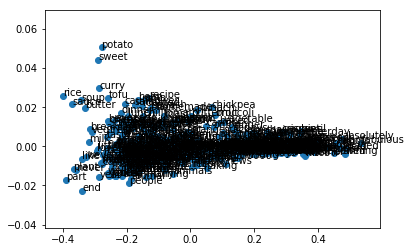

In [552]:
# Visualize the results in a scatter plot!
plt.scatter(result[:,0], result[:,1])

# Add meaning to the scatter plot!
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [553]:
test = list(model.wv.vectors)
len(test)

455

In [554]:
# Find now similarity using the words embddings we have created!
zipped = zip(model.wv.index2word, model.wv.vectors)

wordresult = [i for i in zipped if i[0] == word]
vecresult = [i for i in zipped if i[1] == vector]

In [555]:
model.wv.most_similar('vegan')

[('ready', 0.999852180480957),
 ('dishes', 0.9998490810394287),
 ('special', 0.9998459219932556),
 ('new', 0.999845564365387),
 ('good', 0.9998446702957153),
 ('im', 0.9998416900634766),
 ('wine', 0.9998409748077393),
 ('beautiful', 0.9998403787612915),
 ('try', 0.9998399019241333),
 ('today', 0.9998393058776855)]

In [ ]:
#zip the two lists containing vectors and words
zipped = zip(model.wv.index2word, model.wv.vectors)

# the resulting list contains `(word, wordvector)` tuples. 
# We can extract the entry for any `word` or `vector` 
# (replace with the word/vector you're looking for) using a list comprehension:
wordresult = [i for i in zipped if i[0] == word]
vecresult = [i for i in zipped if i[1] == vector]


wrds = list(model.wv.vocab)
len(wrds)

model.wv.most_similar('ldf18')

### Corpus with hashtags!

In [492]:
# Build the Word2Vec model
model = gensim.models.Word2Vec(
        list_hashtags,
        size=150,
        window=10,
        min_count=30,
        workers=10)
model.train(list_hashtags, total_examples=len(list_hashtags), epochs=10)

(376253, 988090)

In [480]:
# Look at the hashtags that are similar to #vegan!
w1 = 'vegan'
model.wv.most_similar(positive=w1)

[('review', 0.8931894302368164),
 ('veganrecipes', 0.8615270853042603),
 ('friendly', 0.8580796718597412),
 ('watch', 0.8569813966751099),
 ('foodie', 0.8543418645858765),
 ('top', 0.8534507751464844),
 ('found', 0.8490413427352905),
 ('brand', 0.8482712507247925),
 ('meatfree', 0.8477548360824585),
 ('ingredients', 0.8470067381858826)]

In [493]:
# Look at the hashtags that are similar to #vegan!
w2 = 'vegan'
model.wv.most_similar(positive=w2)

[('top', 0.901104748249054),
 ('review', 0.8907033801078796),
 ('video', 0.8806260824203491),
 ('youtube', 0.8668935298919678),
 ('veganrecipes', 0.8596522212028503),
 ('found', 0.8565287590026855),
 ('including', 0.8509935736656189),
 ('watch', 0.8483509421348572),
 ('foodie', 0.8432002067565918),
 ('recipes', 0.8375494480133057)]

### Words per day

Understanding the process of Lemmatization! 
- Aim: Gropuing together the inflected forms of a word so they can be analysed as a single item! (Example: am, are, is = be)
- More information: https://en.wikipedia.org/wiki/Lemmatisation

In [171]:
from nltk.stem import WordNetLemmatizer
from collections import Counter


In [178]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/audevuilliomenet/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [172]:
#import word lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#### With Hashtags!

In [207]:
#group the text by day
day = twittertext.groupby('Day').apply(lambda x: x['noStopWords'].str.cat())

#tokenize the text for that day using word lemmatizer and then count
day = day.apply(lambda x: Counter([
    wordnet_lemmatizer.lemmatize(w) 
    for w in word_tokenize(x) 
    if w.lower() not in stop and not w.isdigit()]))

In [208]:
#count the five most frequent words per day
day_freq = day.apply(lambda x: x.most_common(5))

# create a dataframe of the five most frequent words per day
day_freq = pd.DataFrame.from_records(
    day_freq.values.tolist()).set_index(day_freq.index)

In [209]:
day_freq

,0,1,2,3,4
Day,,,,,
22,"(vegan, 122)","(veganuary2019, 85)","(veganuary, 43)","(amp, 37)","(day, 23)"
23,"(vegan, 133)","(veganuary2019, 61)","(amp, 31)","(veganuary, 29)","(day, 28)"
24,"(vegan, 154)","(veganuary2019, 94)","(veganuary, 40)","(amp, 24)","(day, 16)"
25,"(vegan, 511)","(veganuary, 325)","(amp, 92)","(veganuary2019, 78)","(day, 66)"
26,"(vegan, 432)","(veganuary, 308)","(amp, 79)","(food, 72)","(veganuary2019, 64)"
27,"(vegan, 400)","(veganuary, 277)","(amp, 89)","(day, 64)","(veganuary2019, 53)"
28,"(vegan, 535)","(veganuary, 421)","(veganuary2019, 103)","(amp, 89)","(day, 65)"
29,"(vegan, 477)","(veganuary, 367)","(amp, 83)","(veganuary2019, 74)","(day, 73)"
30,"(vegan, 487)","(veganuary, 395)","(amp, 87)","(day, 66)","(new, 65)"


In [205]:
def normalize_row(x):
    label, repetition = zip(*x)
    t = sum(repetition)
    r = [n/t for n in repetition]
    return list(zip(label,r))

day_freq = day_freq.apply(lambda x: normalize_row(x), axis=1)

#### Without hashtags!

In [198]:
#group the text by day
day_nh = twittertext_nohastags.groupby('Day').apply(lambda x: x['words_analysis'].str.cat())

#tokenize the text for that day using word lemmatizer and then count
day_nh = day_nh.apply(lambda x: Counter([
    wordnet_lemmatizer.lemmatize(w) 
    for w in word_tokenize(x) 
    if w.lower() not in stop and not w.isdigit()]))

In [199]:
#count the five most frequent words per day
day_freq_nh = day_nh.apply(lambda x: x.most_common(5))

# create a dataframe of the five most frequent words per day
day_freq_nh = pd.DataFrame.from_records(
    day_freq_nh.values.tolist()).set_index(day_freq.index)

In [201]:
day_freq_nh

,0,1,2,3,4
Day,,,,,
22,"(vegan, 49)","(want, 18)","(day, 15)","(one, 14)","(get, 13)"
23,"(vegan, 66)","(day, 13)","(new, 12)","(food, 12)","(made, 12)"
24,"(vegan, 82)","(food, 15)","(make, 14)","(day, 13)","(recipe, 13)"
25,"(vegan, 248)","(day, 54)","(food, 52)","(new, 50)","(recipe, 42)"
26,"(vegan, 209)","(food, 62)","(new, 59)","(day, 48)","(recipe, 40)"
27,"(vegan, 186)","(day, 52)","(new, 33)","(food, 33)","(u, 29)"
28,"(vegan, 258)","(day, 55)","(delicious, 53)","(week, 51)","(animal, 48)"
29,"(vegan, 232)","(new, 62)","(day, 60)","(food, 45)","(one, 41)"
30,"(vegan, 230)","(day, 59)","(new, 52)","(end, 50)","(year, 39)"


In [210]:
def normalize_row(x):
    label, repetition = zip(*x)
    t = sum(repetition)
    r = [n/t for n in repetition]
    return list(zip(label,r))

day_freq_nh = day_freq_nh.apply(lambda x: normalize_row(x), axis=1)

In [194]:
twittertext_nohastags.head(2)

,Date,UserID,UserScreenName,Text,UserLocation,retweet_count,UserFollowers,UserFriends,UserLanguage,RetweetUserName,...,tokenText,noStopWords,tokenTextnoStop,tokenCount,clean_no_hashtags,tokenNoHastags,tokenNoHastags_Count,NoHastags_NoStopWords,Token_NoHastags_NoStopWords,words_analysis
0,2019-01-28 23:05:53,1133610576,MarymoBelfast,rt @leedowningkeat: why im still vegan. share and watch this to counteract the ex vegan trend#whyimstillvegan #f,Ireland,6,12498,12525,en,lee downing keat,...,"[rt, leedowningkeat, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trendwhyimstillvegan, f]",rt leedowningkeat im still vegan share watch counteract ex vegan trendwhyimstillvegan f,"[rt, leedowningkeat, im, still, vegan, share, watch, counteract, ex, vegan, trendwhyimstillvegan, f]",17,rt why im still vegan share and watch this to counteract the ex vegan trend,"[rt, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trend]",15,rt im still vegan share watch counteract ex vegan trend,"[rt, im, still, vegan, share, watch, counteract, ex, vegan, trend]",im still vegan share watch counteract ex vegan trend
1,2019-01-28 23:03:51,1088500218964828160,Lilly84914614,"rt @xvx_food: lunch today was the @marksandspencer sweet potato biryani wrap and some of their salted tortilla chips, it was absolutely del",NaN,0,3,17,en,Vegan Food Only Ⓥ,...,"[rt, xvxfood, lunch, today, was, the, marksandspencer, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",rt xvxfood lunch today marksandspencer sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, xvxfood, lunch, today, marksandspencer, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]",22,rt lunch today was the sweet potato biryani wrap and some of their salted tortilla chips it was absolutely del,"[rt, lunch, today, was, the, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",20,rt lunch today sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, lunch, today, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]",lunch today sweet potato biryani wrap salted tortilla chips absolutely del


In [168]:
from collections import Counter
 
count_all = Counter()
for line in twittertext_nohastags.Token_NoHastags_NoStopWords:
    # Create a list with all the terms
    all_words = [word for word in line]
    # Update the counter
    count_all.update(all_words)
    # Print the first 5 most frequent words
print(count_all.most_common(20))

[('rt', 2880), ('vegan', 2264), ('amp', 781), ('day', 575), ('new', 570), ('last', 435), ('food', 370), ('delicious', 350), ('veganuary', 337), ('one', 324), ('try', 311), ('recipe', 310), ('today', 288), ('get', 288), ('made', 281), ('end', 275), ('great', 274), ('love', 267), ('go', 259), ('good', 245)]


In [65]:
# Need to install plotly before using it! Run the !pip command bellow!
# !pip install plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.io as pio

#You can also plot your graphs offline inside a Jupyter Notebook Environment. 
#First you need to initiate the Plotly Notebook mode as below:
init_notebook_mode(connected=True)

In [67]:
most_common = pd.DataFrame(count_all.most_common(20))
most_common['Freq'] = (most_common[1]/778)*100
most_common

,0,1,Freq
0,vegan,383,49.23
1,veganuary2019,312,40.10
2,veganuary,134,17.22
3,weareveganuary,52,6.68
4,new,44,5.66
5,plantbased,44,5.66
6,food,41,5.27
7,delicious,39,5.01
8,day,36,4.63
9,recipe,34,4.37


In [68]:
data = [Bar(
        x=most_common[0], # assign x as the dataframe column 'x'
        y=most_common['Freq']
    )]

layout = Layout(
    title="Top 10 most used words in Tweets",
    xaxis=dict(title='Most famous words'),
    yaxis=dict(title='Percentage of word appearance in the tweets'),
    width = 700
)

fig = Figure(data=data, layout=layout)

iplot(fig)

In [37]:
#import Google's langdetect library to check where tweets are english or not
from langdetect import detect

In [38]:
lang = []

try:
    for index, row in twittertext['cleanText'].iteritems():
        lang = detect(row)
        twittertext.loc[index, 'Languagereveiw'] = lang

except Exception:
    pass

In [67]:
twittertext.Languagereveiw.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Languagereveiw'

In [40]:
twittertext = twittertext.loc[twittertext['Languagereveiw'] == 'en']
twittertext.shape

(1513, 28)

In [41]:
twittertext_nodup = twittertext.drop_duplicates(subset='cleanText')
twittertext_nodup.shape

(778, 28)

In [69]:
twittertext.head(3)

,Unnamed: 0,Date,UserID,UserScreenName,Text,UserLocation,retweet_count,UserFollowers,UserFriends,UserLanguage,...,FreqHour,hashtags,twitter_handles,cleanText,tokenText,tokenCount,noStopWords,tokenTextnoStop,Languagereveiw,words_analysis
0,0,2019-01-28 23:05:53,1133610576,MarymoBelfast,rt @leedowningkeat: why im still vegan. share and watch this to counteract the ex vegan trend#whyimstillvegan #f,Ireland,6,12498,12525,en,...,658,"[#whyimstillvegan, #f]",[@leedowningkeat],rt leedowningkeat why im still vegan share and watch this to counteract the ex vegan trendwhyimstillvegan f,"[rt, leedowningkeat, why, im, still, vegan, share, and, watch, this, to, counteract, the, ex, vegan, trendwhyimstillvegan, f]",17,rt leedowningkeat im still vegan share watch counteract ex vegan trendwhyimstillvegan f,"[rt, leedowningkeat, im, still, vegan, share, watch, counteract, ex, vegan, trendwhyimstillvegan, f]",en,leedowningkeat still vegan share watch counteract ex vegan trendwhyimstillvegan f
1,1,2019-01-28 23:03:51,1088500218964828160,Lilly84914614,"rt @xvx_food: lunch today was the @marksandspencer sweet potato biryani wrap and some of their salted tortilla chips, it was absolutely del",NaN,0,3,17,en,...,658,[],"[@xvx_food, @marksandspencer]",rt xvxfood lunch today was the marksandspencer sweet potato biryani wrap and some of their salted tortilla chips it was absolutely del,"[rt, xvxfood, lunch, today, was, the, marksandspencer, sweet, potato, biryani, wrap, and, some, of, their, salted, tortilla, chips, it, was, absolutely, del]",22,rt xvxfood lunch today marksandspencer sweet potato biryani wrap salted tortilla chips absolutely del,"[rt, xvxfood, lunch, today, marksandspencer, sweet, potato, biryani, wrap, salted, tortilla, chips, absolutely, del]",en,xvxfood lunch today marksandspencer sweet potato biryani wrap salted tortilla chips absolutely del
2,2,2019-01-28 23:03:46,1948014944,GeorgiaRaeBrown,what an angel now this is the kind of #mondaymotivaton im taking about! via: @bbcnews,"England, United Kingdom",0,1280,1024,en,...,658,[#mondaymotivaton],[@bbcnews],what an angel now this is the kind of mondaymotivaton im taking about via bbcnews,"[what, an, angel, now, this, is, the, kind, of, mondaymotivaton, im, taking, about, via, bbcnews]",15,angel kind mondaymotivaton im taking via bbcnews,"[angel, kind, mondaymotivaton, im, taking, via, bbcnews]",en,angel kind mondaymotivaton taking via bbcnews


In [78]:
hashtags = []

for sublist in twittertext.hashtags:
    for word in sublist:
        hashtags.append(word)

In [81]:
# Transform the list of hastags into a dataframe
hashtags_df = pd.DataFrame(hashtags)
# Rename the columns of the dataframe
hashtags_df.columns = ['words']
# Calculate the frequency of the hashtags
hashtags_df['freq'] = hashtags_df.groupby('words')['words'].transform('count')

hashtags_df.shape


(2462, 2)

In [85]:
hashtags_df.words.value_counts()[:20]

#veganuary2019     410
#vegan             333
#competition       185
#veganuary         173
#govegan            49
#plantbased         46
#crueltyfree        46
#animals            44
#veganism           43
#species            33
#veganfood          28
#win                25
#giveaway           19
#meatfreemonday     19
#veguide            17
#gove               16
#vegetarian         13
#veganuary2019?     12
#food               11
#dairyfree          11
Name: words, dtype: int64

In [86]:
hash_count = pd.DataFrame(hashtags_df.words.value_counts()[:20])
hash_count.reset_index(inplace=True)
hash_count.columns = ['hashtag', 'count_hashtag']

In [94]:
count = pd.concat([word_count, hash_count], axis=1)
count

,word,count_words,hashtag,count_hashtag
0,rt,1012,#veganuary2019,410
1,vegan,661,#vegan,333
2,january,441,#competition,185
3,veganuary2019,431,#veganuary,173
4,veganuary,246,#govegan,49
5,us,211,#plantbased,46
6,way,195,#crueltyfree,46
7,better,192,#animals,44
8,pachamamabars,188,#veganism,43
9,competition,186,#species,33


## Words per day

## Google API - Sentiment Analysis

In [42]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS']="veganuary-analysis-b3484d8fefa8.json"

In [43]:
import argparse

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

client = language.LanguageServiceClient()

In [44]:
sent_list = []

for i, row in twittertext_nodup.iterrows():
    
    sent_dict={}
    
    document = types.Document(content=twittertext_nodup['cleanText'][i],
            type=enums.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(document).document_sentiment
    
    sent_dict['Sentiment'] = sentiment.score
    sent_dict['Magnitude'] = sentiment.magnitude
    sent_dict['Date'] = twittertext_nodup['Date'][i]
    #sent_dict['UserId'] = twittertext_nodup['UserID'][i]
    #sent_dict['UserScreenName'] = twittertext_nodup['UserScreenName'][i]
    #sent_dict['cleanText'] = twittertext_nodup['cleanText'][i]
    
    sent_list.append(sent_dict)
    
    # print(sent_dict

InvalidArgument: 400 The language tr is not supported for document_sentiment analysis.